# Main Paper Figures

This notebook provides all code and documentation necessary to reproduce the figures presented in the manuscript *Strategies to Accelerate US Coal Power Phaseout Using Contextual Retirement Vulnerabilities*.

In [ ]:
# Todo: replace with pip install retire 
import sys 
sys.path.append("..")

from retire import Explore
from retire.data import load_dataset, load_clean_dataset, load_projection, load_graph, load_generator_level_dataset
from retire.examples import heatmap_config


In [2]:
raw_df = load_dataset()           
clean_df = load_clean_dataset()  
projection_df = load_projection() 
G = load_graph()    
plotkit = Explore(raw_df=raw_df, G=G)

## Figure 1a: Age-Based Retirement Scenario versus Current State of US Coal Retirements

This figure is based on generator-level data, which—while not the primary unit of analysis in the manuscript—is essential for capturing the true granularity of coal retirement patterns.  To ensure full reproducibility, the generator-level dataset is provided in the package's resources, and the code below reproduces Figure 1a as shown in the paper.

Our main dataset aggregates variables to the plant level (due to ~80% of the 62 studied variables being available only at that scale), and because of this the `retire` package does not include analytic functionality for generator-level operations. 

In [ ]:

import plotly.graph_objects as go


df = load_generator_level_dataset() 
# Define matching keys for colors/patterns
viz_color_dict = {
    'No Planned Retirement, Retired at 50yrs Old (GW)': ['#731f22', "/"],
    'Partial Plant Retirement – Generator Not Planned (GW)': ['#ff0000', "+"],
    'Partial Plant Retirement – Generator Planned (GW)': ['#ADD9F4', ""],
    'Full Planned Retirement (GW)': ['#476C9B', "x"]
}

# Bar plot: Stacked by retirement type
fig = go.Figure()
for col in ['No Planned Retirement, Retired at 50yrs Old (GW)',
            'Partial Plant Retirement – Generator Not Planned (GW)',
            'Partial Plant Retirement – Generator Planned (GW)',
            'Full Planned Retirement (GW)']:
    fig.add_trace(go.Bar(
        x=df['Year'],
        y=df[col],
        name=col,
        marker_color=viz_color_dict[col][0]
    ))

# Line: Age-Based Retirement Trajectory
fig.add_trace(go.Scatter(
    x=df['Year'],
    y=df['Total Coal Capacity at Age Based Retirement Trajectory (GW)'],
    name='Total Coal Capacity at <i>Age-Based</i> Retirement Trajectory',
    yaxis='y2',
    marker_color='grey',
    line_width=3
))

# Line: Planned Retirement Trajectory
fig.add_trace(go.Scatter(
    x=df['Year'],
    y=df['Total Coal Capacity at Planned Retirement Trajectory (GW)'],
    name='Total Coal Capacity at <i>Planned</i> Retirement Trajectory',
    yaxis='y2',
    mode="lines",
    marker_color='lightgrey',
    line_width=3
))

# Add annotation: Planned Retirement by 2035
final_val = df[df['Year'] == 2035]['Total Coal Capacity at Planned Retirement Trajectory (GW)'].values[0]
fig.add_annotation(
    x=2036.25,
    y=final_val,
    text=f"<span style='font-size: 90%;'><i>Planned Retirement Trajectory:</i></span><br><b>{final_val:,.0f} GW of Coal Capacity Remains by 2035</b>",
    showarrow=False,
    font=dict(size=12, color="black"),
    yref='y2',
    xshift=-25.5,
    align='left',
    xanchor='left'
)

# Add annotation: Age-based retirement case by 2035
age_based_val = df[df['Year'] == 2035]['Total Coal Capacity at Age Based Retirement Trajectory (GW)'].values[0]
unplanned_total = df.loc[df['Year'] <= 2035, 'No Planned Retirement, Retired at 50yrs Old (GW)'].sum() + \
                  df.loc[df['Year'] <= 2035, 'Partial Plant Retirement – Generator Not Planned (GW)'].sum()
fig.add_annotation(
    x=2036.25,
    y=age_based_val + 20,
    text=f"<span style='font-size: 90%;'><i>If the {int(round(unplanned_total, 0))} GW of coal generation with <b>no</b> current retirement plans retires at 50 yrs,</i></span><br><b>{age_based_val:,.0f} GW of Coal Capacity Remains by 2035</b>",
    showarrow=False,
    font=dict(size=12, color="black"),
    yref='y2',
    xshift=-25.5,
    align='left',
    xanchor='left'
)

# Add vertical line at 2035
fig.add_vline(x=2035, line_width=3, opacity=1, line_dash="dash", line_color="lightgrey")

# Format axes and layout
fig.update_layout(
    bargap=0.1,
    template='simple_white',
    barmode='stack',
    title_x=0,
    yaxis=dict(title='Capacity Retired (GW)'),
    yaxis2=dict(
        overlaying='y',
        side='right',
        title='Total Capacity Remaining (GW)',
        range=[0, 200]
    ),
    xaxis=dict(range=(2023.5, 2064)),
    font_size=14,
    margin=dict(r=10, l=10, t=20, b=10),
    legend=dict(x=0, y=-0.2, orientation='h', traceorder='grouped'),
    height=450,
    width=1200
)

# Export/Show
fig.show(config={
    "toImageButtonOptions": {
        "format": "svg",
        "filename": "whatIf_retirement_timeline",
    }
})

## Figure 1 (b): Retirement Status Map of the US Coal Fleet (as of 2022)

In [4]:
fig, ax = plotkit.drawMap()

# Figure 2: Graph-based classification of the US coal fleet 

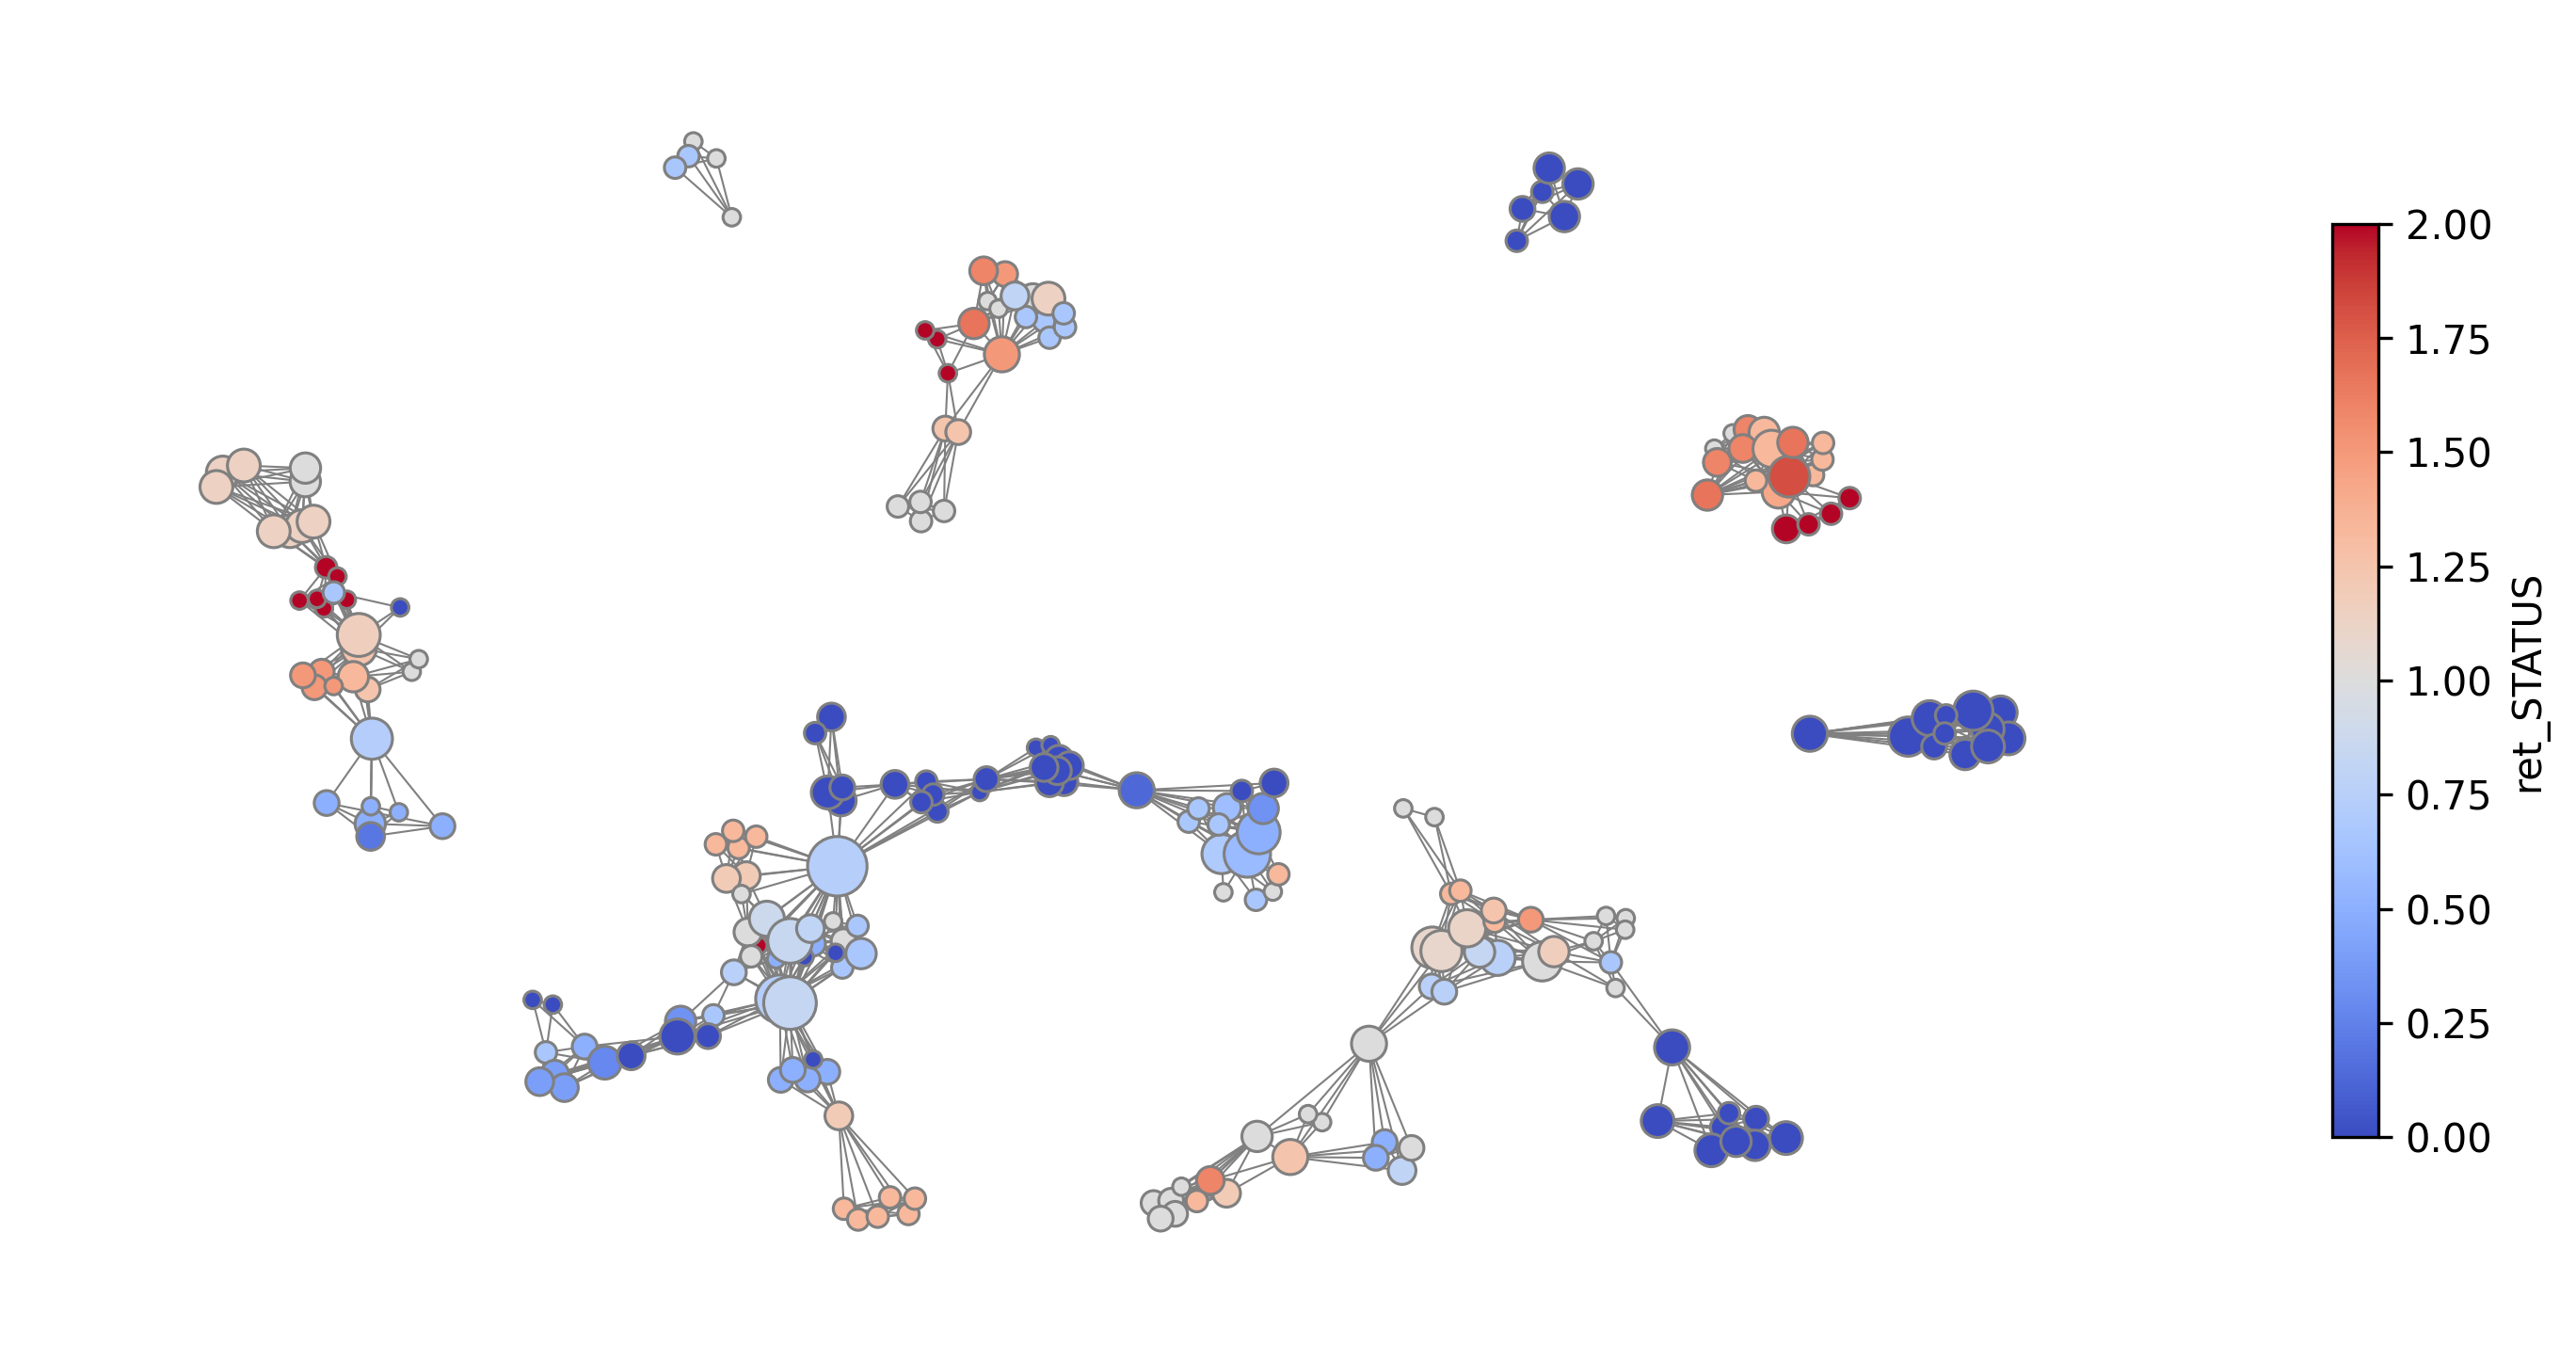

In [5]:
fig, ax = plotkit.drawGraph(show_colorbar=True,  col = "ret_STATUS", color_method="average")

# Figure 3: Key Group Characteristics

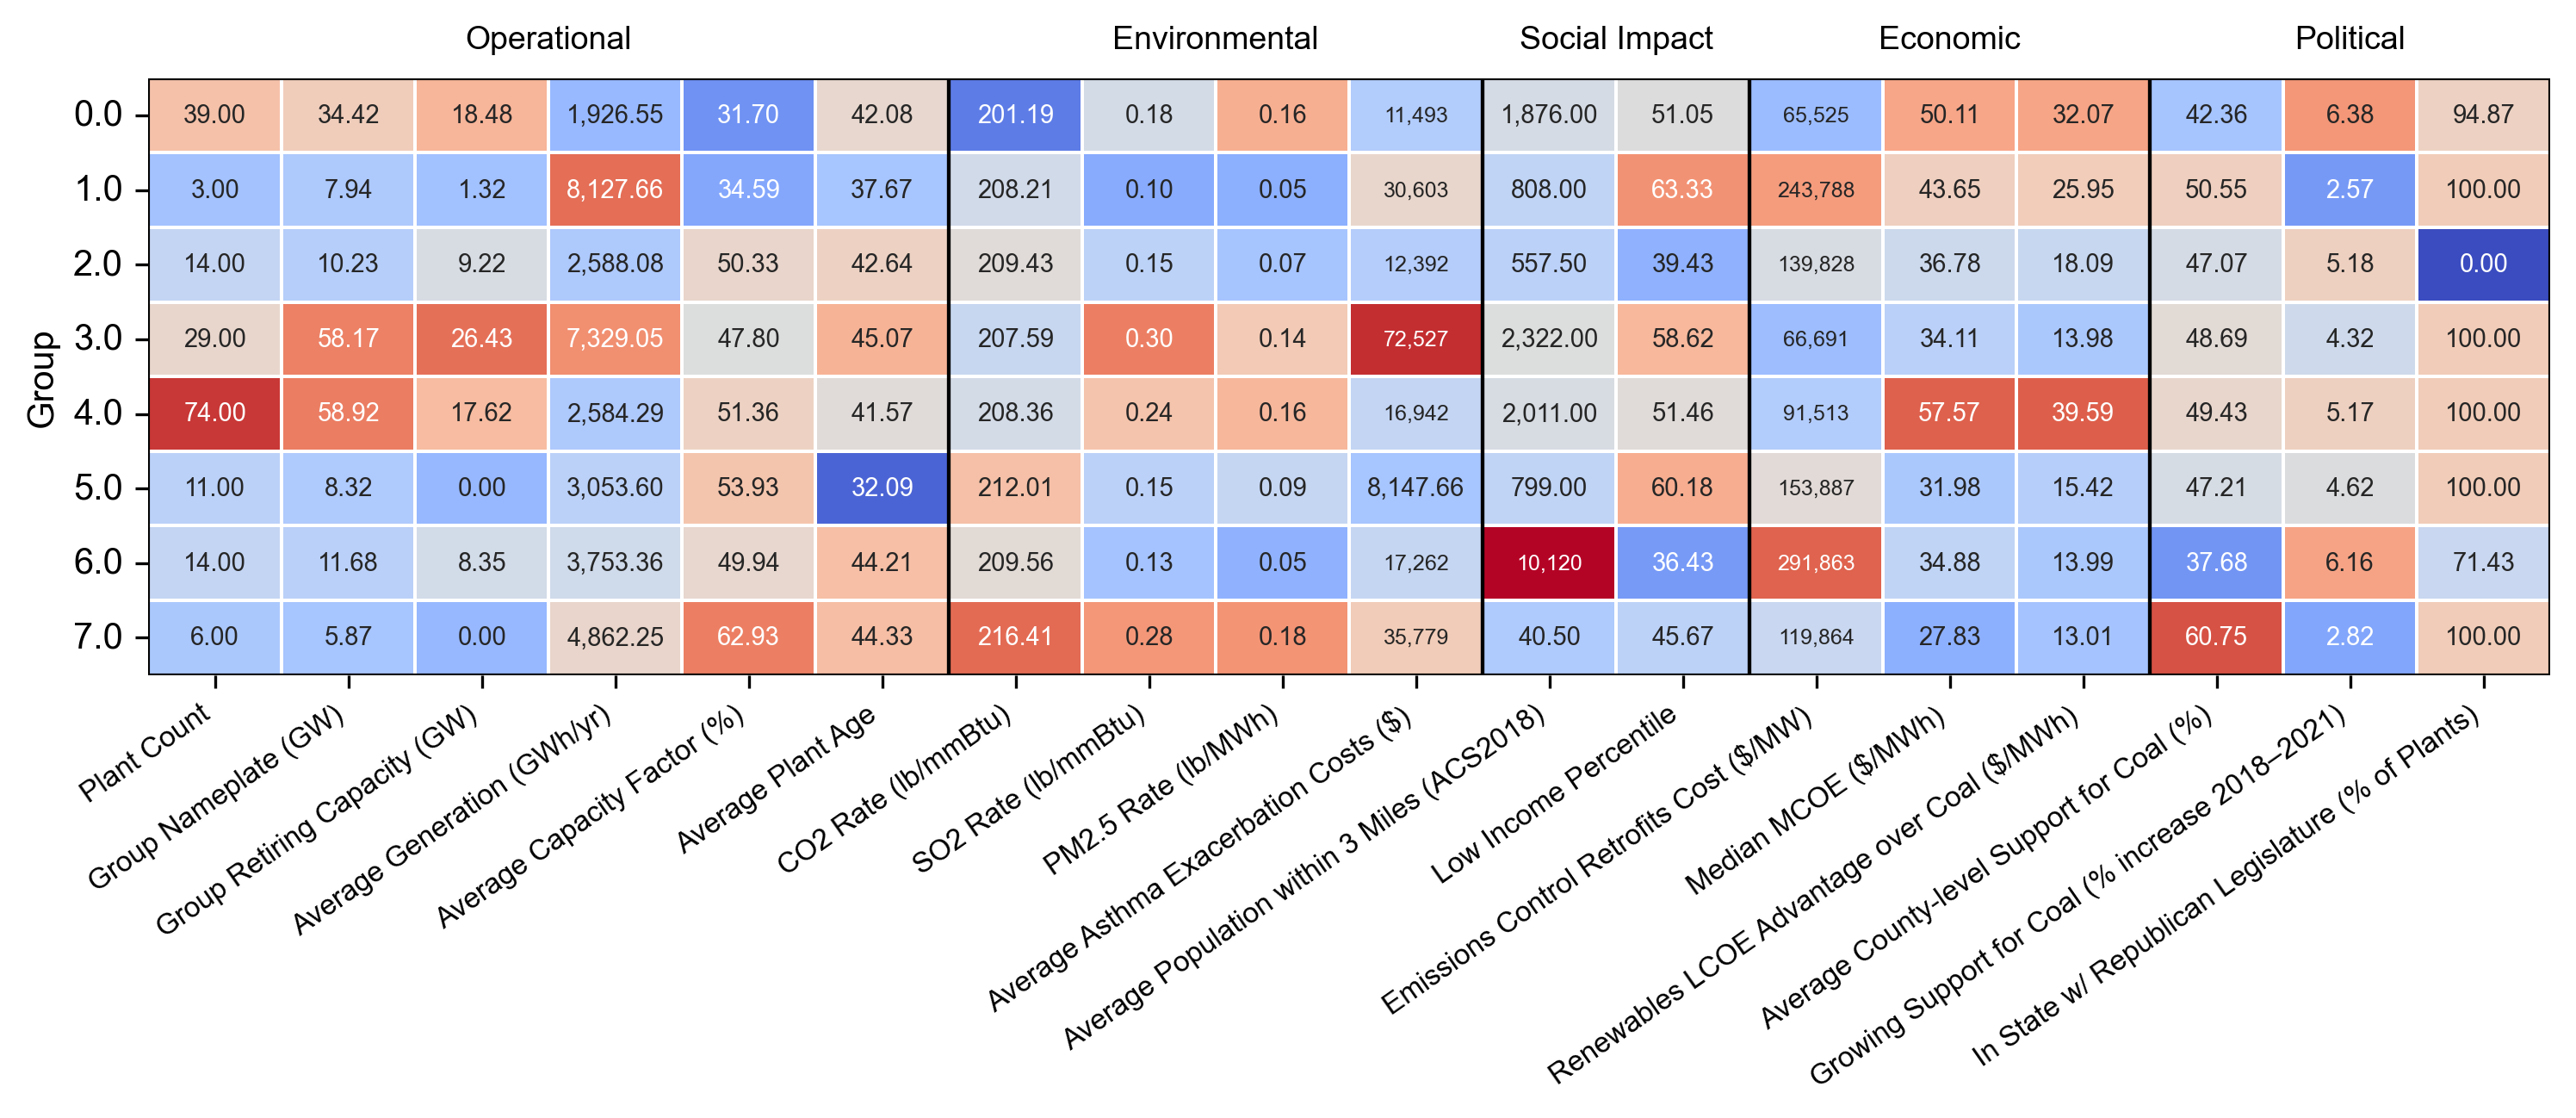

In [6]:
fig, ax = plotkit.drawHeatMap(config=heatmap_config)

## Figure 4: Group Vulnerability Map

In [7]:
fig, ax = plotkit.drawComponentsMap()

# Figure 5: Retirement proximity Graphs of Group 0 (Fuel Blend Plants) and Group 4 (Expensive Plants)

 

<div class="alert alert-block alert-warning"> 

<b>Warning:</b> `retire` has updated to using forceatlas2_layout in our maintained codebase, so the component orientation is slightly different than the Graphic in Fig. 5. 

<b>Warning:</b>  `retire` has updated its labeling of target nodes from 'S' ('sink') to 'T' (target). 
 </div>

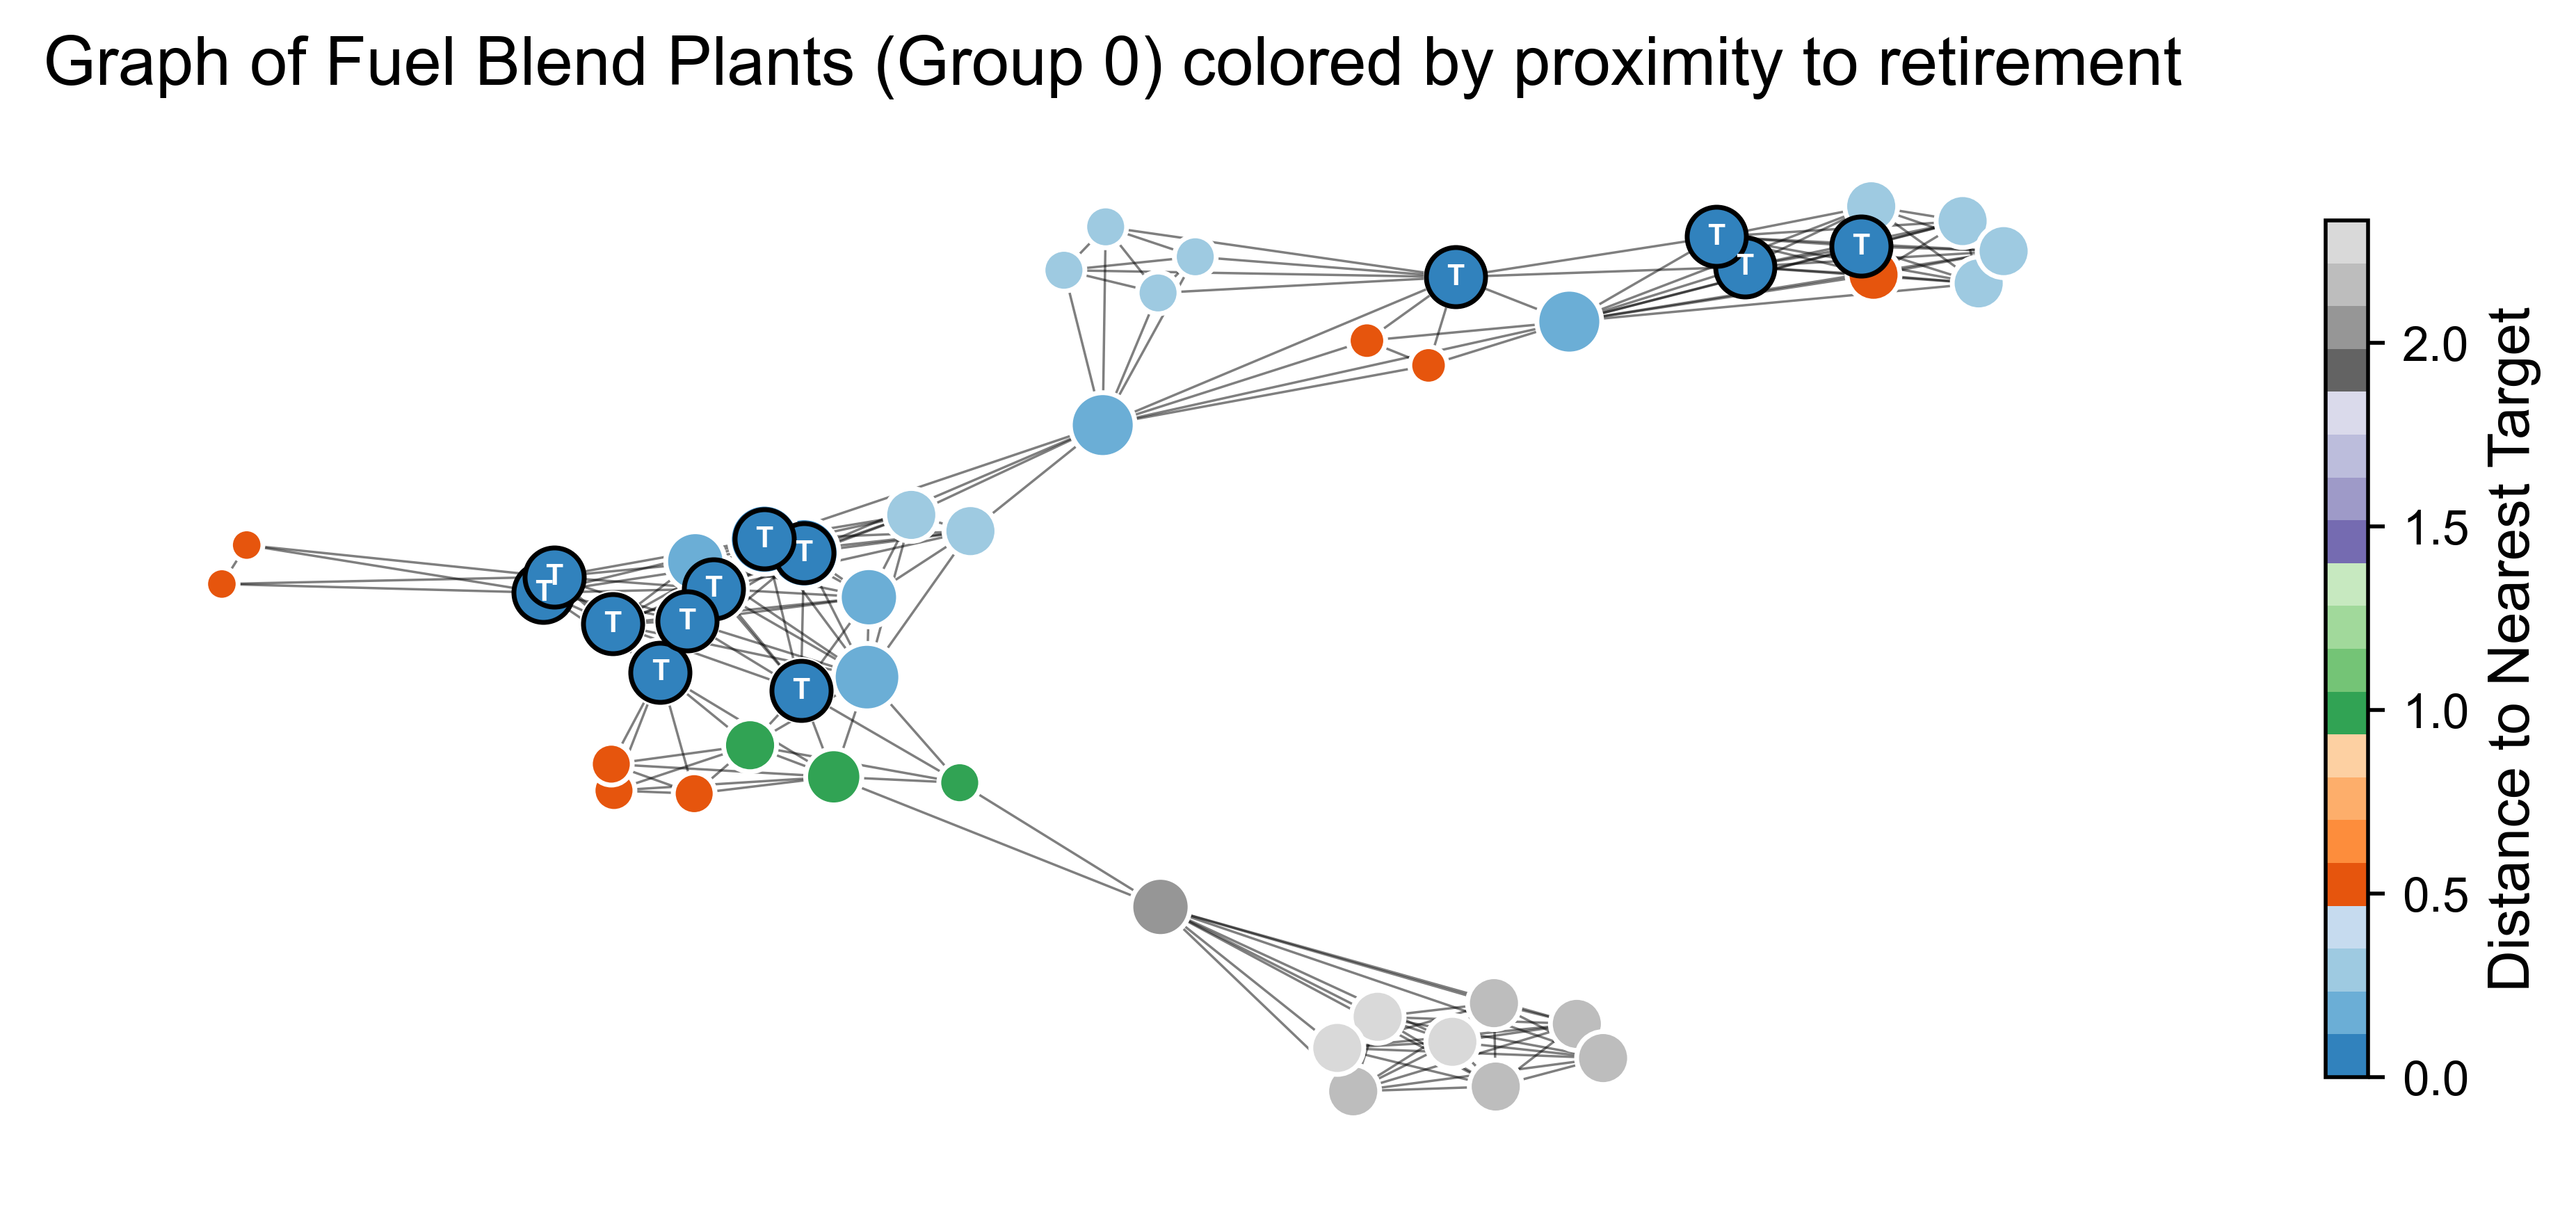

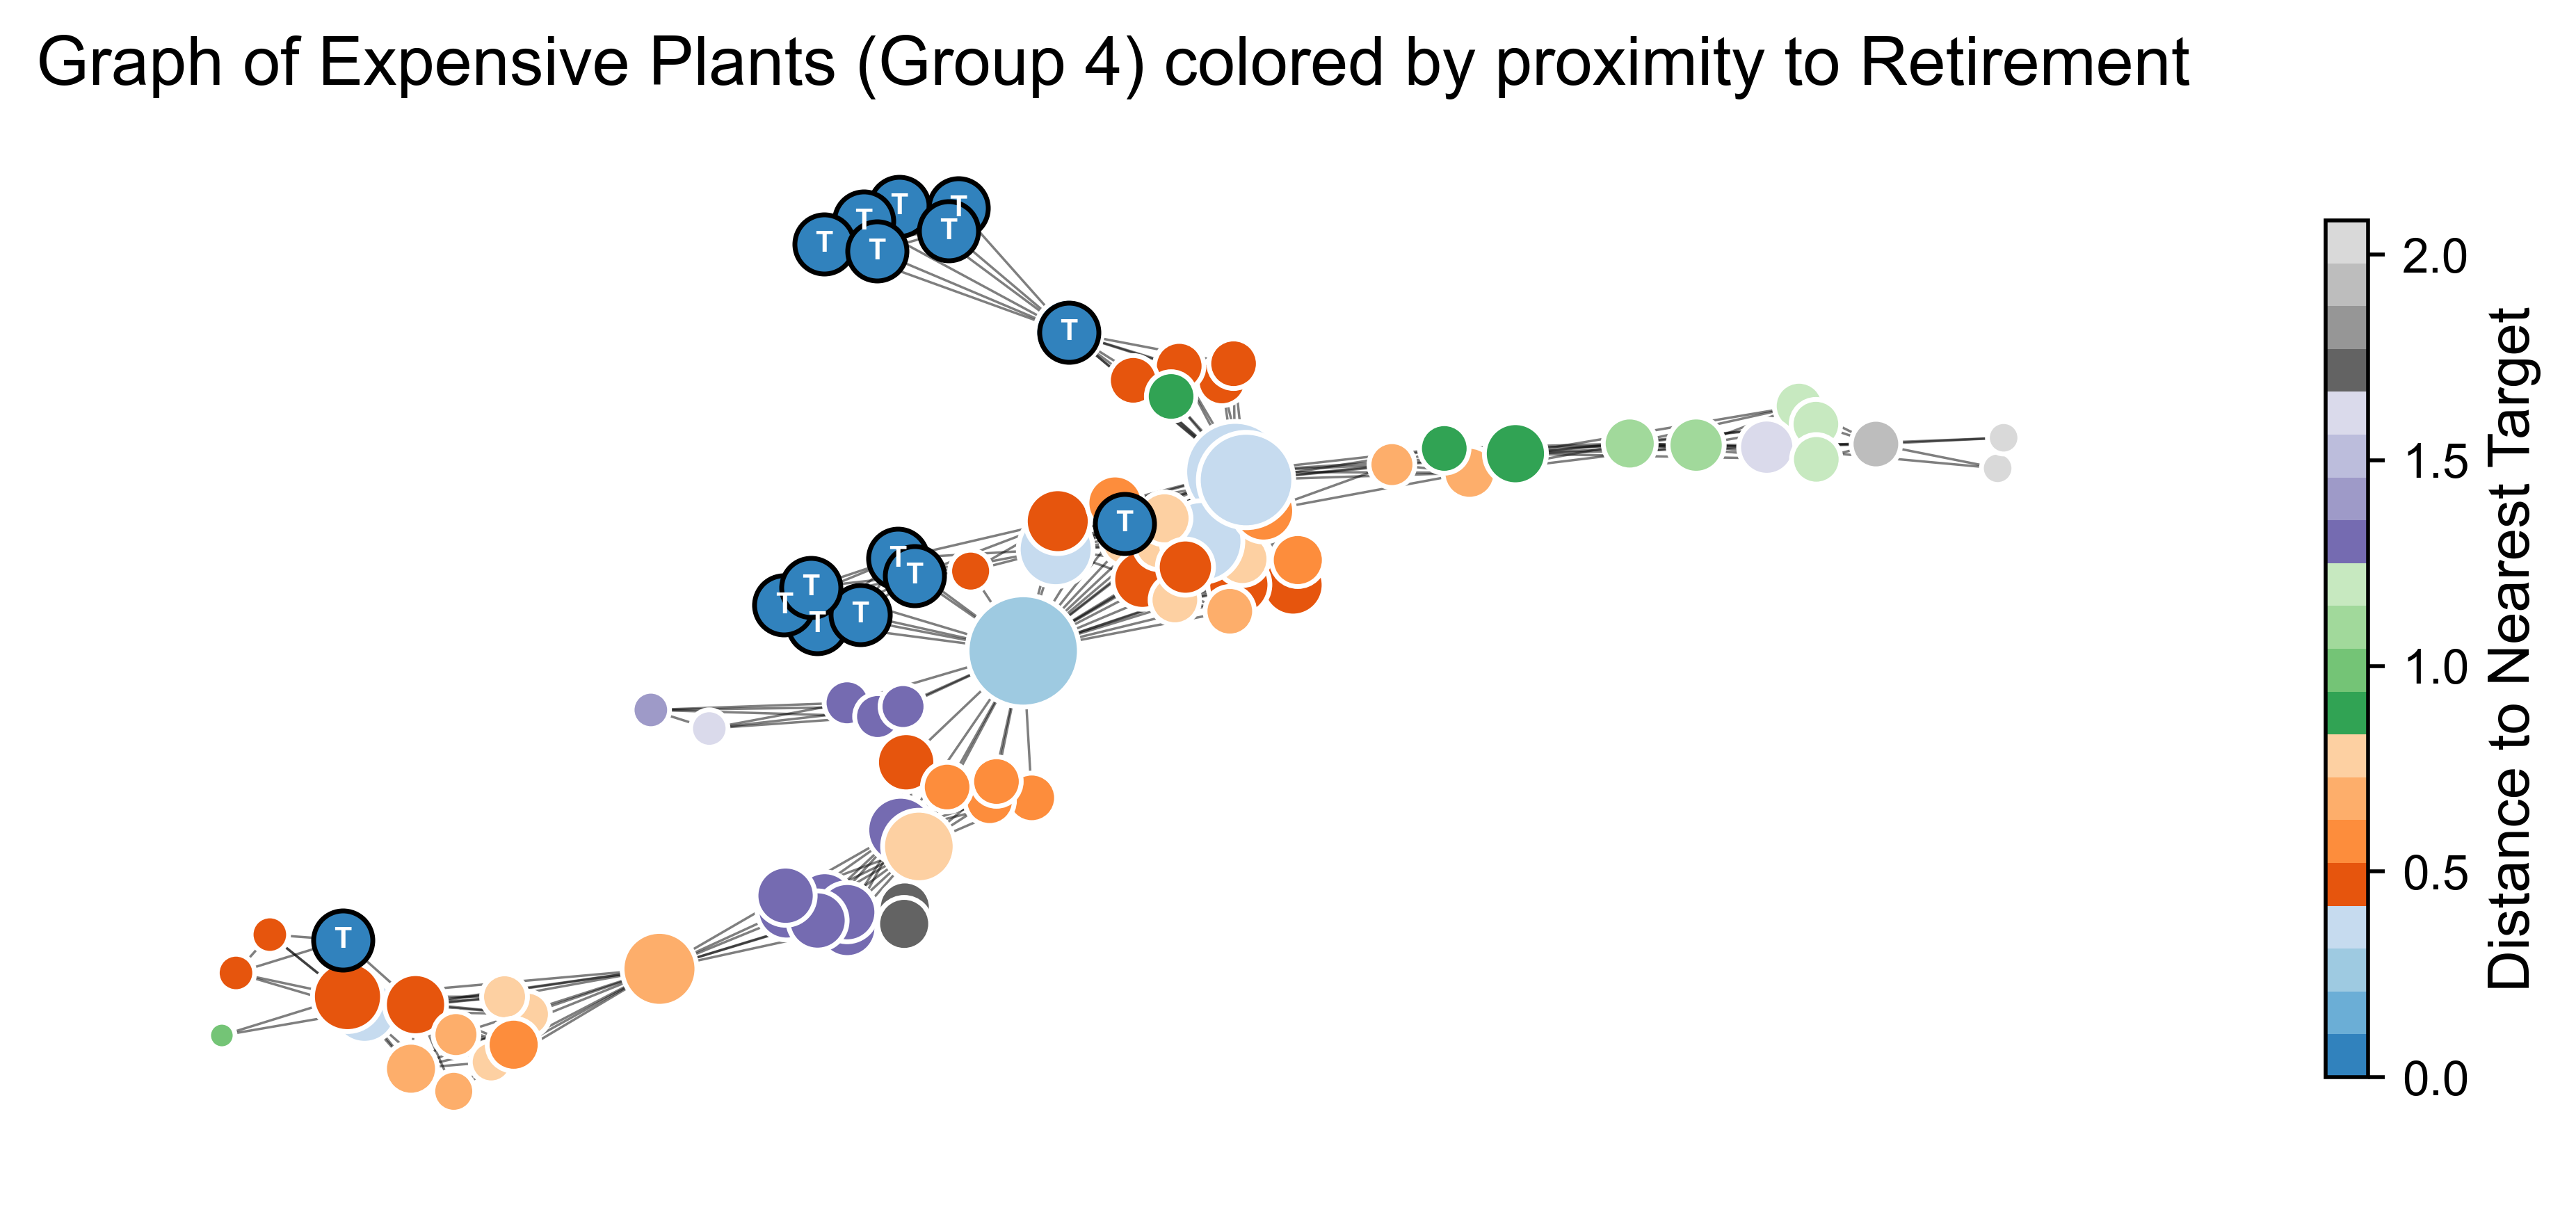

In [8]:
component = 0
threshold = 0.5 
col = "Percent Capacity Retiring"
retiring_nodes = plotkit.get_target_nodes(component=component,  col=col, threshold=threshold)
node_distances = plotkit.get_shortest_distances_to_targets(component=component, targets=retiring_nodes)
fig, ax = plotkit.drawPathDistance(component=component, 
                    targets=retiring_nodes, 
                    distances_dict=node_distances, 
                    title=f"Graph of Fuel Blend Plants (Group 0) colored by proximity to retirement",
                    seed=5, 
                    show_colorbar=True) 
component = 4
threshold = 0.5 
col = "Percent Capacity Retiring"
retiring_nodes = plotkit.get_target_nodes(component=component,  col=col, threshold=threshold)
node_distances = plotkit.get_shortest_distances_to_targets(component=component, targets=retiring_nodes)
fig, ax = plotkit.drawPathDistance(component=component, 
                    targets=retiring_nodes, 
                    distances_dict=node_distances, 
                    title=f"Graph of Expensive Plants (Group 4) colored by proximity to Retirement",
                    seed=5, 
                    show_colorbar=True) 

## Figure 6: Network Analysis of Group 3: High Health Impact Plants

<div class="alert alert-block alert-warning"> 

<b>Warning:</b> `retire` has updated to using forceatlas2_layout in our maintained codebase, so the component orientation is slightly different than the Graphic in Fig. 5. 
</div>

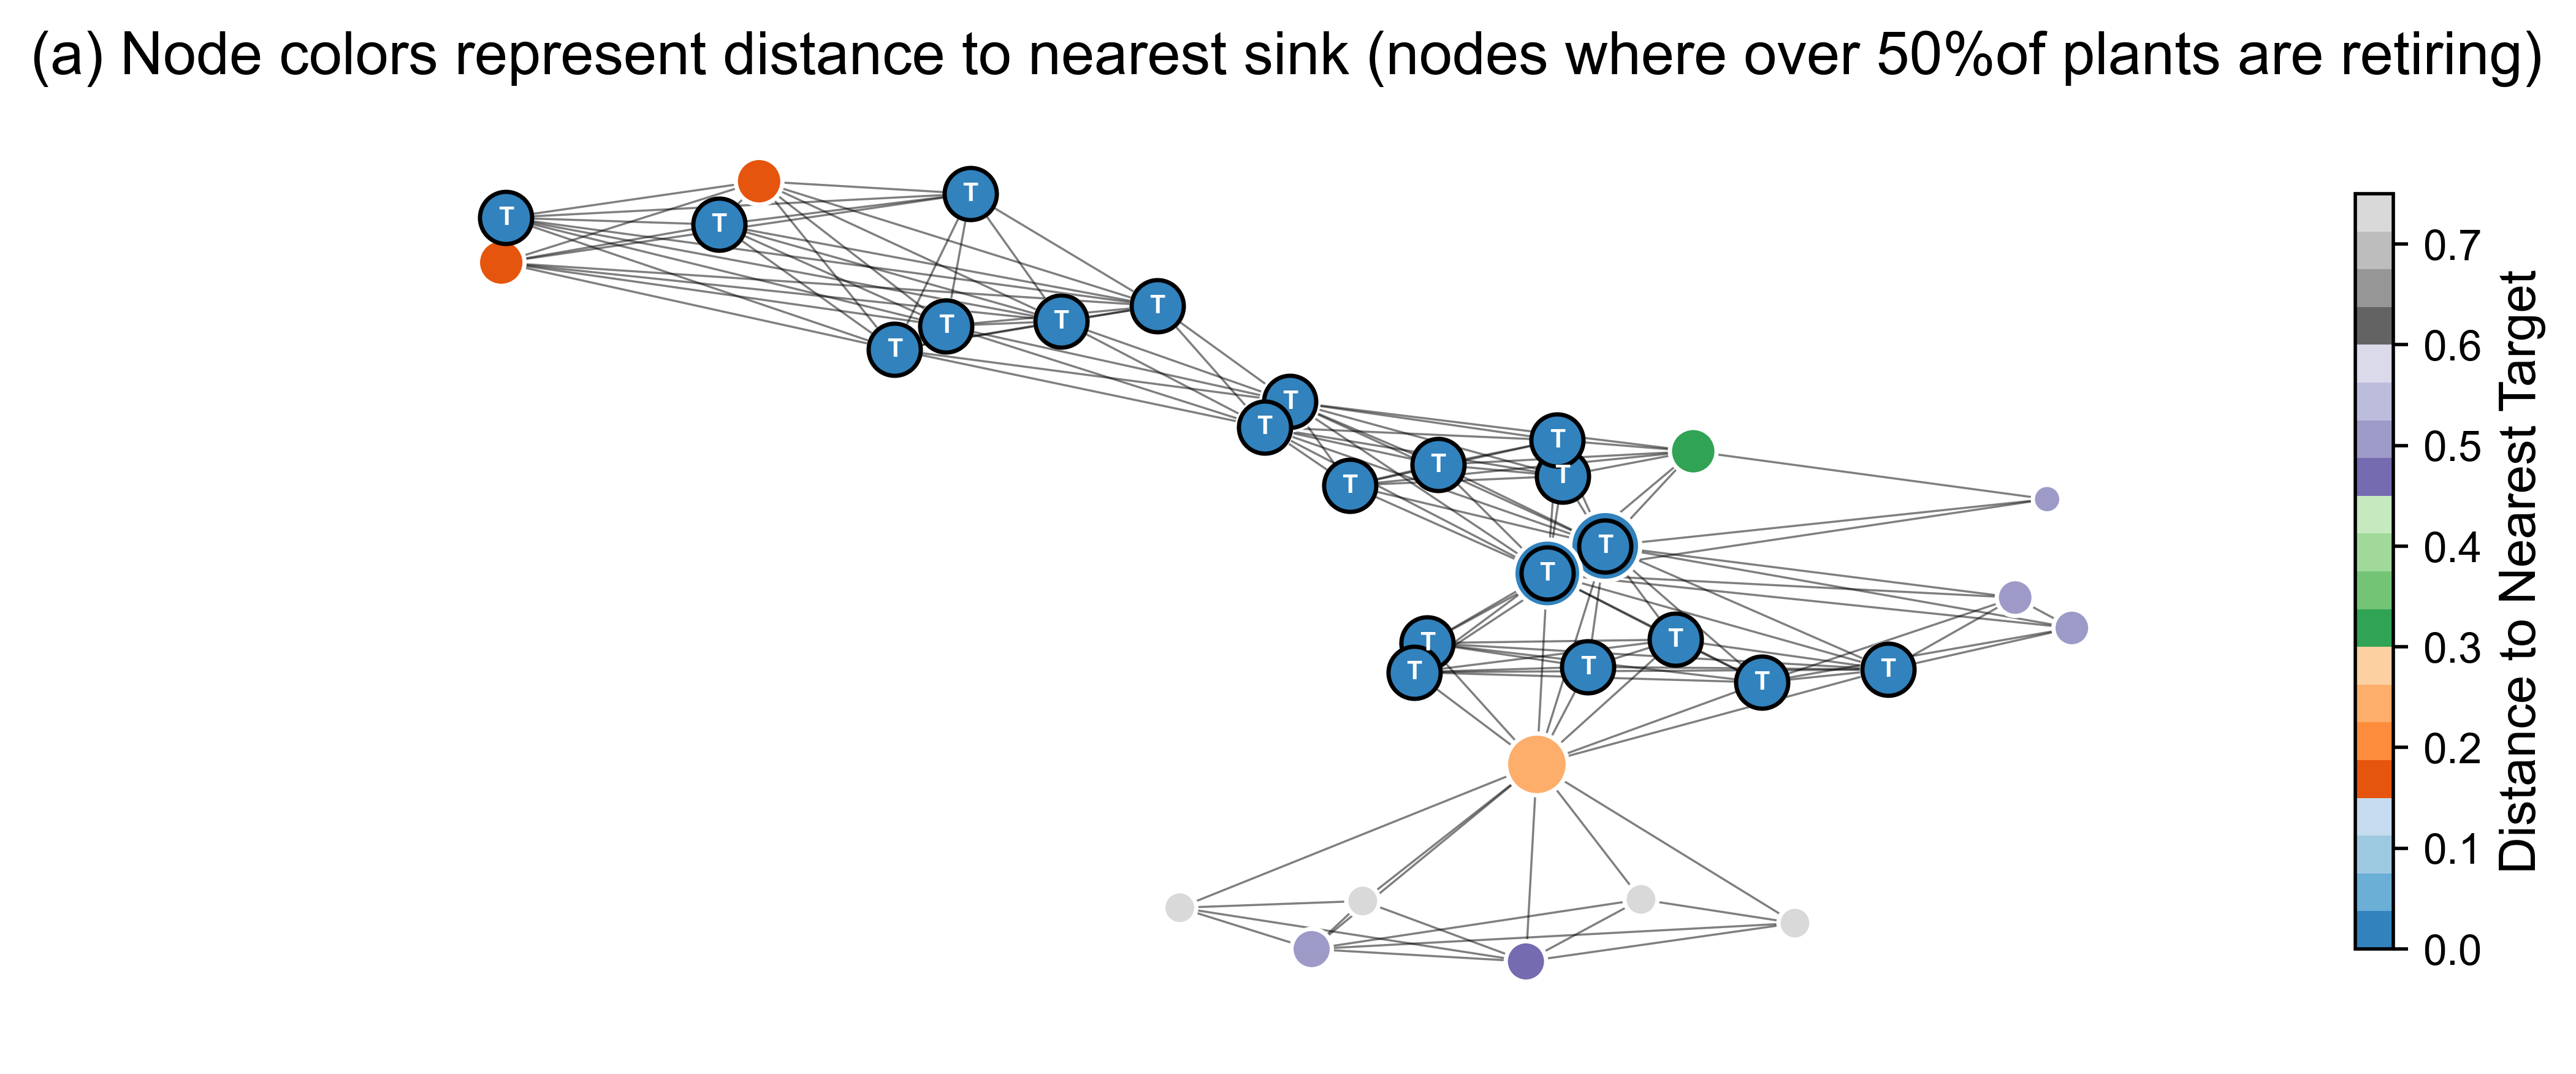

In [9]:
component = 3
threshold = 0.5 
col = "Percent Capacity Retiring"
retiring_nodes = plotkit.get_target_nodes(component=component,  col=col, threshold=threshold)
node_distances = plotkit.get_shortest_distances_to_targets(component=component, targets=retiring_nodes)
fig, ax = plotkit.drawPathDistance(component=component, 
                    targets=retiring_nodes, 
                    distances_dict=node_distances, 
                    title="(a) Node colors represent distance to nearest sink (nodes where over 50%of plants are retiring)",
                    seed=5, 
                    show_colorbar=True)

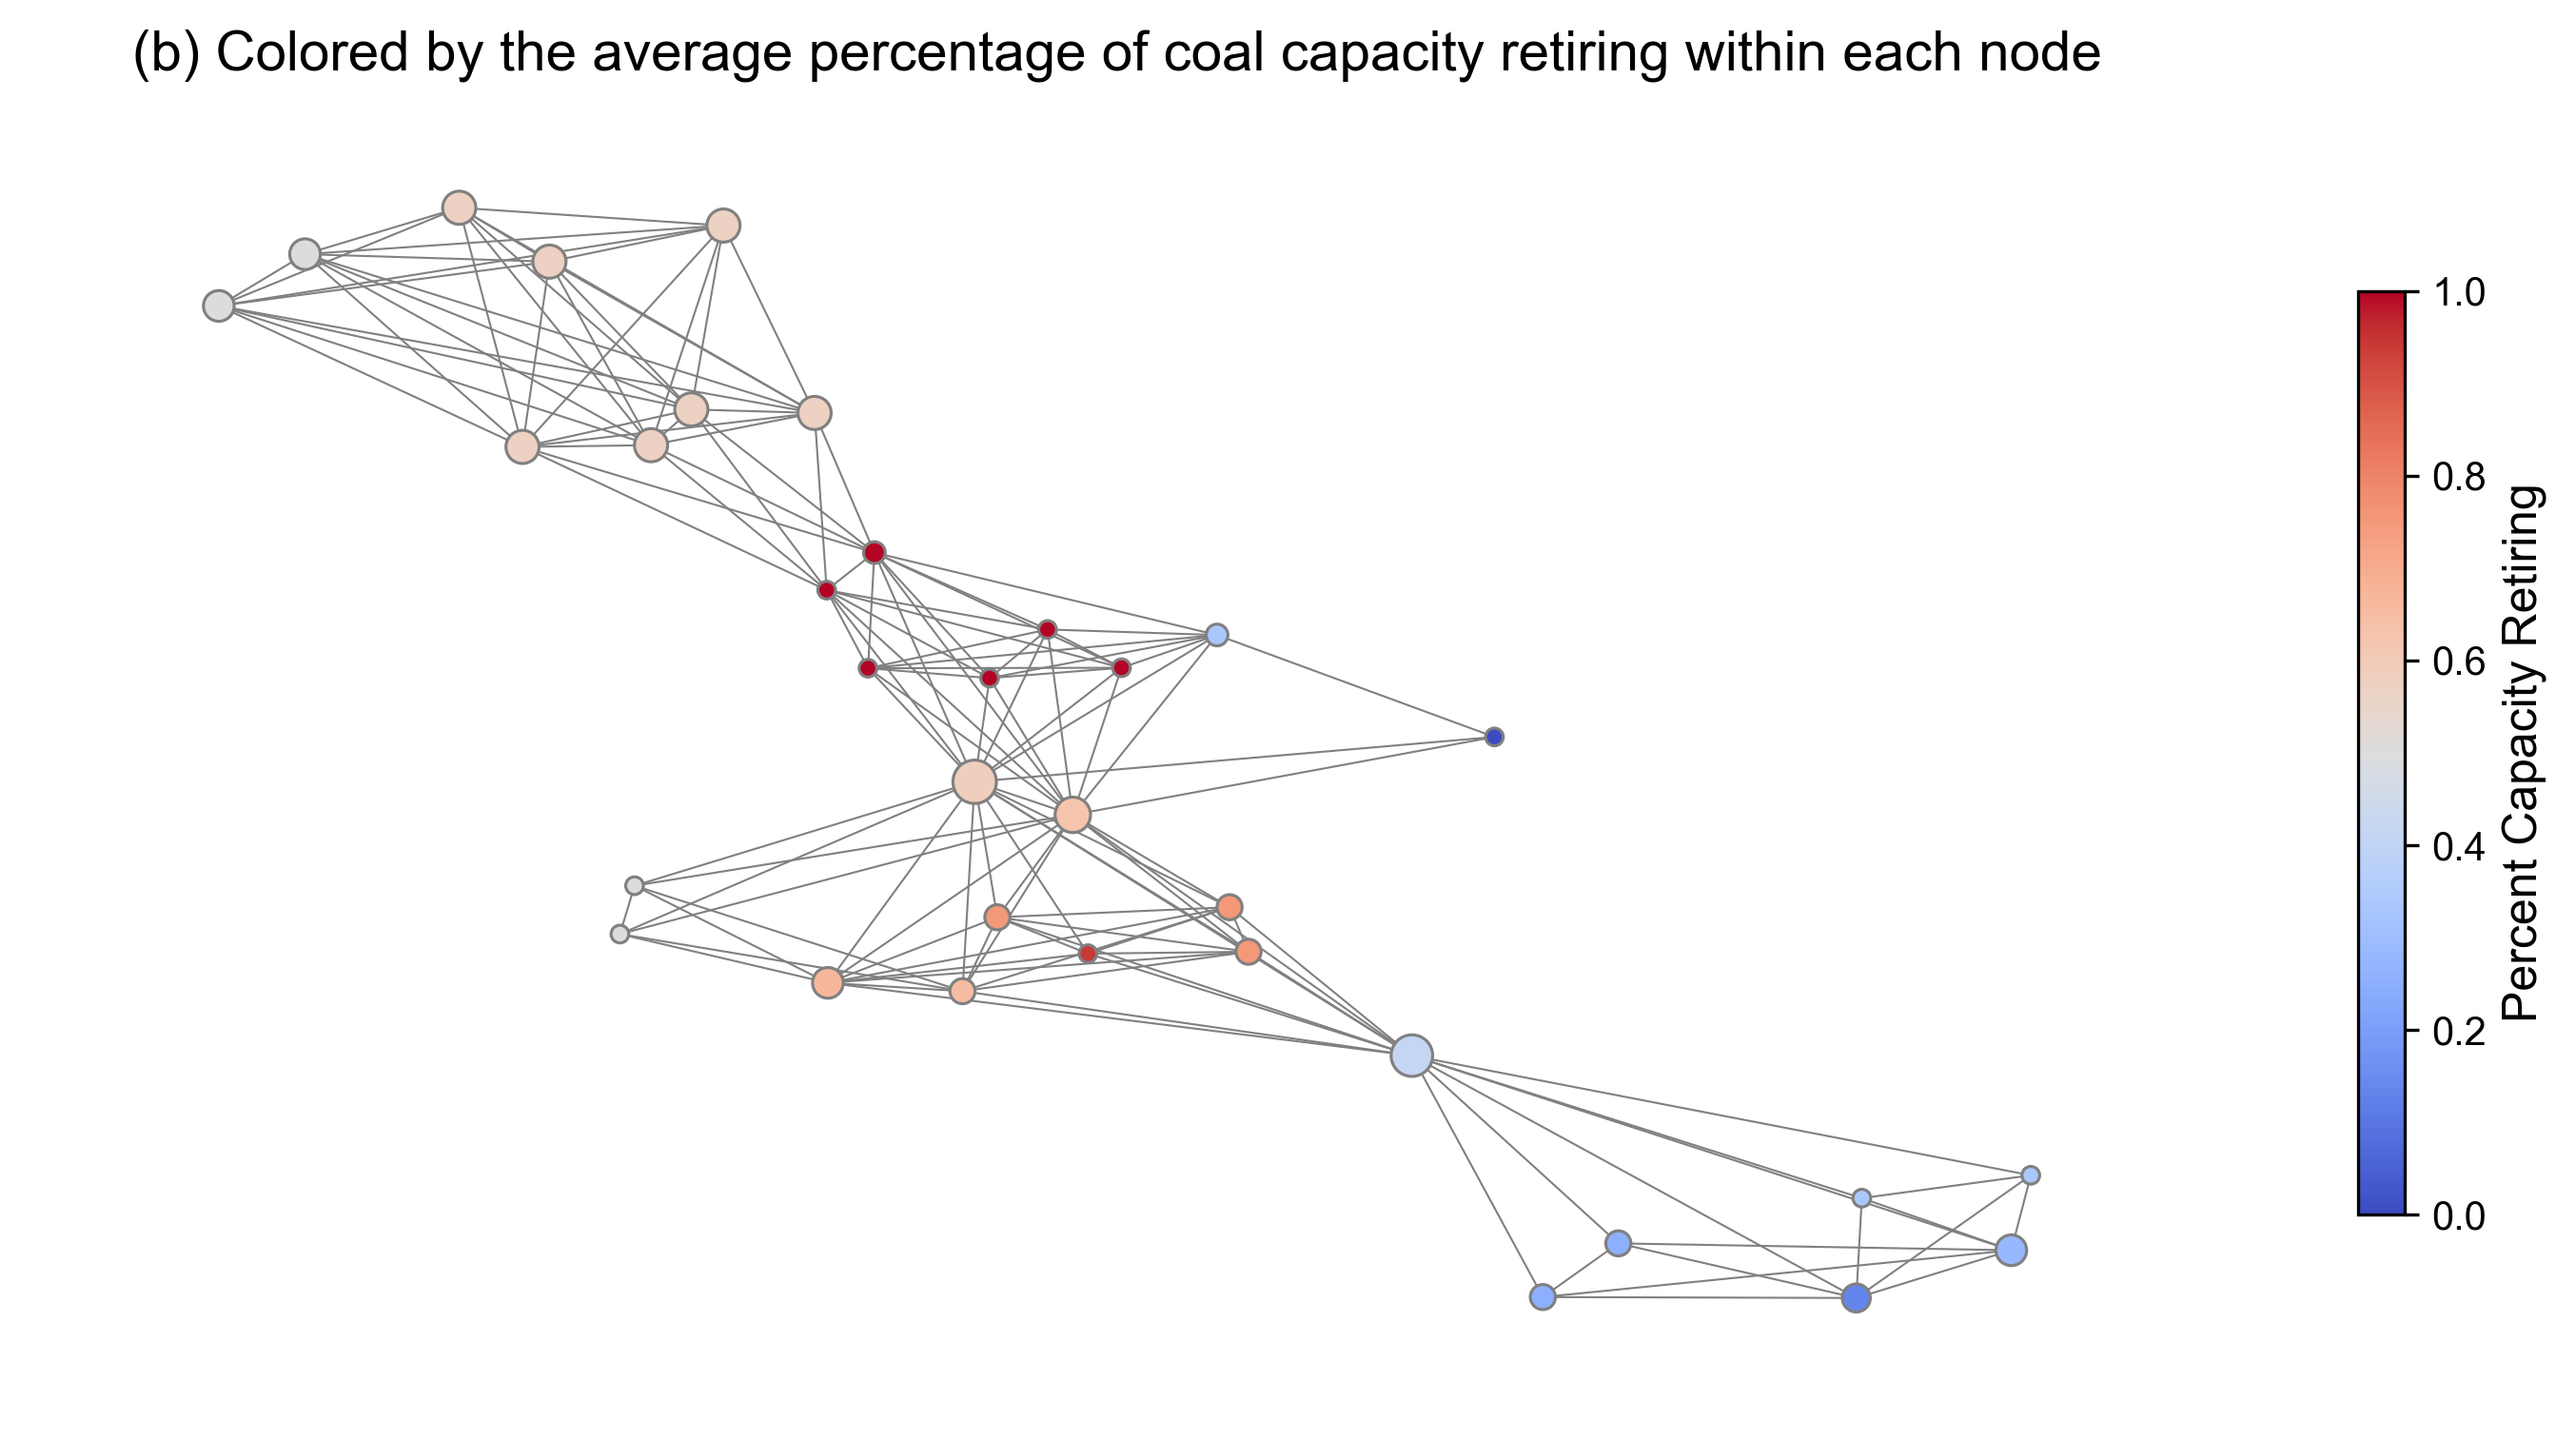

In [10]:
fig, ax = plotkit.drawComponent(component=3, show_colorbar=True, col="Percent Capacity Retiring", title="(b) Colored by the average percentage of coal capacity retiring within each node " ) 

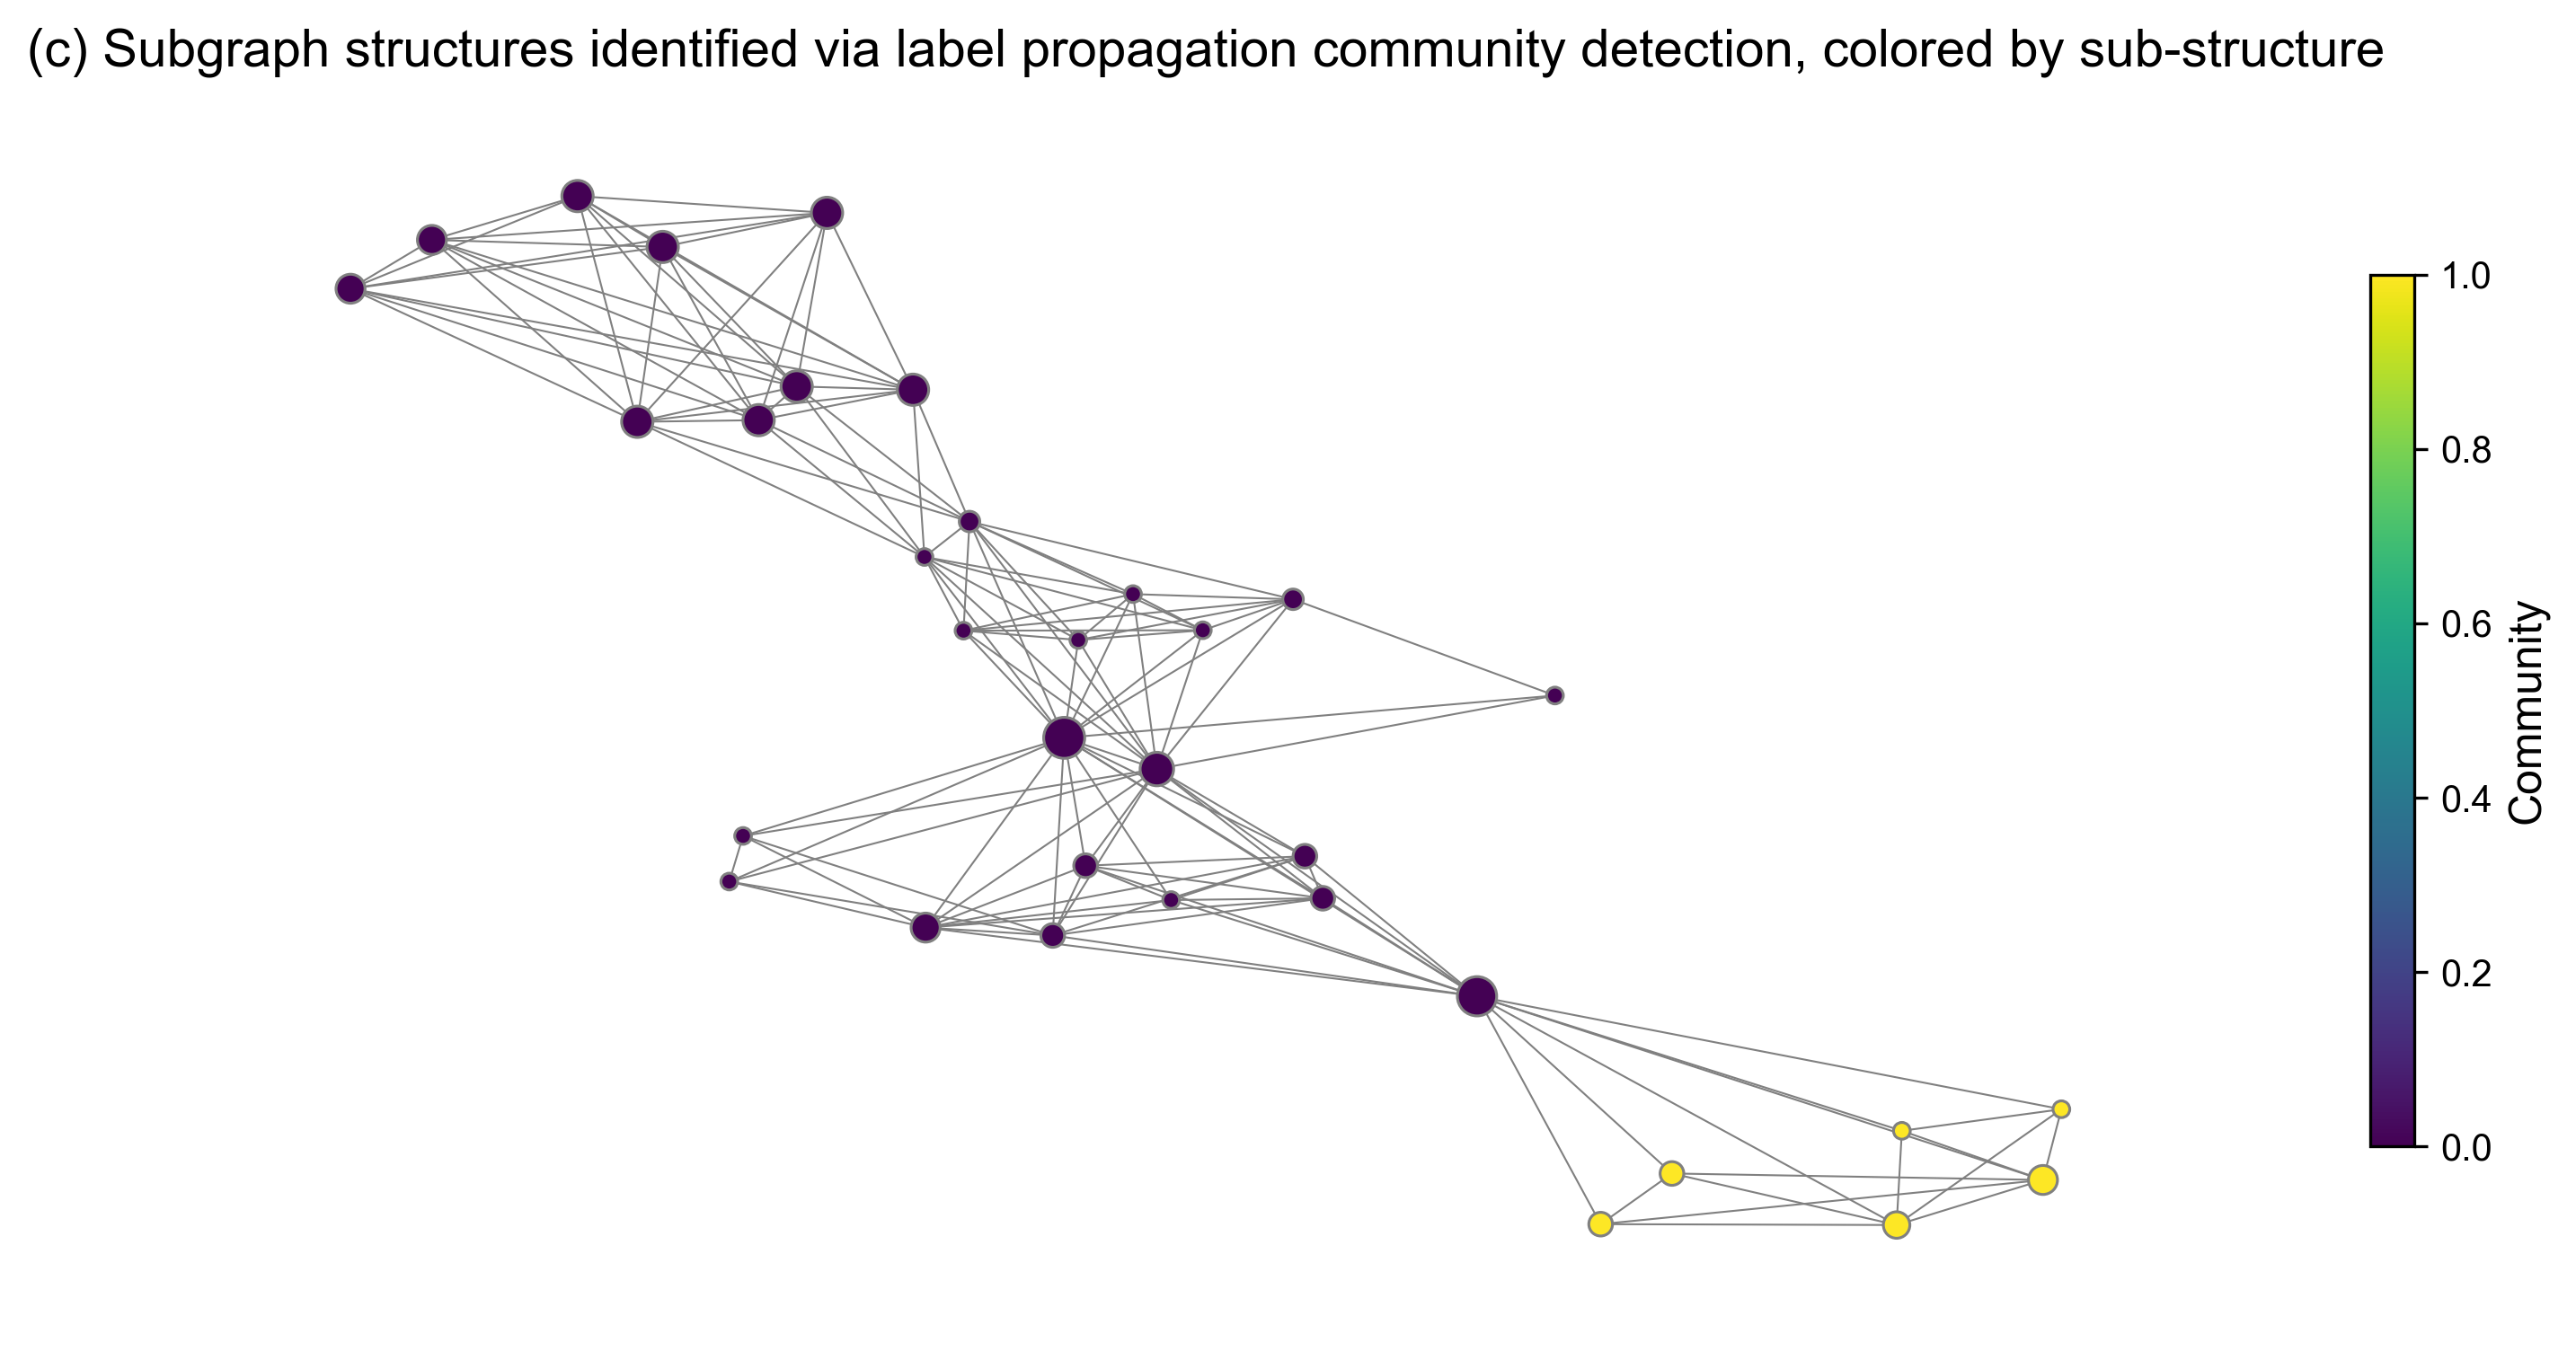

In [11]:
fig, ax = plotkit.drawComponent(component=3, color_method="community", show_colorbar=True, title="(c) Subgraph structures identified via label propagation community detection, colored by sub-structure")

## Figure 7: Coal Fleet Proximity to Retirement

In [12]:
fig, ax = plotkit.drawBar(title="Fleet Vulnerability Breakdown")

In [13]:
fig, ax = plotkit.drawSankey(title="Group Proximatey to Retirement") 
